<center>

# EE2703 - Assignment 5

## Name : ANIRUDH B S
## Roll No : EE21B019
</center>

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
%matplotlib ipympl

### Assumption - 
The above mentioned packages are installed. If not installed, please install the same. 

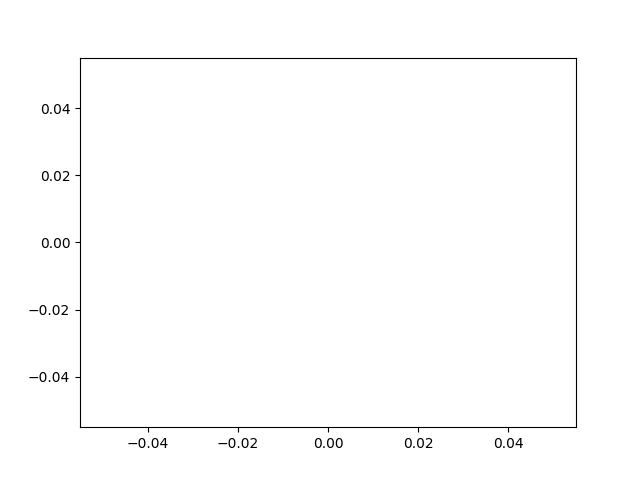

In [2]:
fig1, ax1 = plt.subplots() #Creating figure and axis where the animation will take place
xdata, ydata = [], [] #Empty list of x and y data
ln, = ax1.plot([], [], 'r') #To return the plot object

def init1():
    ax1.set_xlim(-1.2, 1.2) #Setting of x and y limits
    ax1.set_ylim(-1.2, 1.2)
    return ln, 

## Approach 1

### The math behind the shapes
From the video it is quite obvious to note that one of the point is (1,0) which is one of the roots of unity.
I claim that the corner points of each figure is a nth root of unity in the complex Argand plane. 

In short, each corner point is having coordinate (cos($\frac{2\pi k}{n}$), sin($\frac{2\pi k}{n}$)) where n is the n-gon being spoken about and k runs from 0 to n-1. The proof is simple. From the video its clear that the polygon are regular, that is all side lengths are same, thus each vertex must be one of the nth roots of unity. 

By symmetry arguments, it is clear that there must be an equal number of points between any two points on the edge and thus, I have used equal number of points connecting any two corner points. 


### How to get $\alpha$  ?
Depending on the frame number, the morph function produces an intermediate image of two shapes. 
Further, it is assumed that any frame is a superposition of atmost two frames and not any number higher than that. 
The total number of frames, as will be seen later, is taken to be 600. 

To generate upto n sides, we will need n-3 forward transitions and n-3 backward transitions. (This is because we start from triangle and go till a n-gon)
This imples frame per transition is $\frac{600}{2(n-3)}$ which is $\frac{300}{(n-3)}$. Let us call this fpt.

The lower frame index is the point at which transition from n to n+1 gon or vice-versa starts. This clearly can be obtained by floor division of frame by fpt. (frames per transition)
Thus, 
<center>
    $lower frame index$ = floor($\frac{frame}{fpt}$)
</center>
The division parameter $\alpha$ is found out using this formula 
<center>
    $\alpha$ = $\frac{frame - lower frame index}{fpt}$
</center>
This helps in uniformly distributing 60 frames over an $\alpha$ range of 0 to 1 for each specific transition. 

For n = 8, (what we need to do), the fpt comes out to be 300/5 = 60. Thus, there are 60 frames per transition. Intuitively, itseems obvious that since fpt is 60, each lower frame index is a multiple of 60, which is indeed true. 
Thus, $\alpha$ in this case simply boils down to, 
<center>
    $\alpha$ = $\frac{frame - 60*floor(\frac{frame}{60})}{60}$
</center>

In [3]:
try : 
    x = int(input("Enter no of sides till which you need the animation to go!"))
    if x<=3 :
        print("Enter a number more than 3")
        sys.exit()
except ValueError:
    print("Enter a natural number")

Enter no of sides till which you need the animation to go!8


In [4]:
noofside = x #Change this if the number of sides needs to be changed
t = np.math.factorial(noofside) #Using numpy standard library to get factorial of no of sides

### Approach 1
This approach works for any no of sides to generate a video for 10 seconds. 
This generates a video quite similar to the one posted. However, is slightly different. This maps points on line joining any two vertices on a n-gon to its corresponding point on a n+1 gon (in forward transition). This is different from Approach 2, which uses vertex splitting as described later.

In [5]:
def f(t,n): #Function that returns the list of points given t no of points and n the no of sides
    x, y = [], []
    for i in range(n):
        xi = np.linspace(np.cos(i*2*np.pi/n), np.cos((i+1)*2*np.pi/n), t//n)
        yi = np.linspace(np.sin(i*2*np.pi/n), np.sin((i+1)*2*np.pi/n), t//n)
        x.extend(xi)
        y.extend(yi)
    return x, y

### What does f do ?
f generates the list of t points given a n sided polygon.

In [6]:
def update1(frame):
    global noofside, t
    k = 300/(noofside-3) #Determine no of frames per transition
    m = frame//k #Determine transition in progress
    if frame <= 300 :
        x1, y1 = f(t, (int(frame/k) + 3)) #Forward animation
        x2, y2 = f(t, (int(frame/k) + 4))
    else :
        x1, y1 = f(t, noofside - int((frame-300)/k)) #Backward Animation
        x2, y2 = f(t, noofside - int((frame-300)/k) - 1)
    xdata, ydata = morph1(x1, y1, x2, y2, frame)
    ln.set_data(xdata, ydata) #Set plot data so that plotting is done
    return ln, 

### What does update1 do ?
update1 generates the sequence of animation shapes to be followed. For example, for no of sides = 8, it dictates the sequence 3 to 8 and then 8 to 3 based on the input parameter frame. As the number of frames increase, the length of the video increases. As evident, the transition time from n gon to n+1 gon depends on the number of frames being used.

In [7]:
def morph1(x1, y1, x2, y2, frame):
    global noofside
    k = 300/(noofside-3) #Determine no of frames per transition
    m = frame//k #Determine transition in progress
    alpha = (frame - m*k)/k #Determine morphing factor alpha
    xm = (1-alpha) * np.array(x1) + (alpha)* np.array(x2)
    ym = (1-alpha) * np.array(y1) + (alpha) * np.array(y2)
    return xm, ym #Return morphed image

### What does morph1 do ?
morph1 is a function that returns a linear combination of two lists x1 and x2, and y1 and y2 respectively. It returns (1-$\alpha$) x1 + ($\alpha$) x2 as needed. Since alpha transitions from 0 to 1, initially we need the shape to be x1. This constraint is satisfied by the function. 

Also, as described earlier, alpha has been obtained following "How to get $\alpha$"

/home/anirudh/.local/lib/python3.8/site-packages/matplotlib/animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


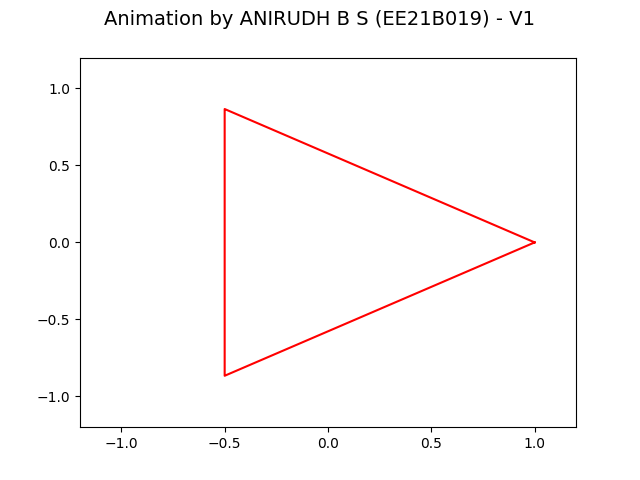

In [11]:
ani = FuncAnimation(fig1, update1, frames = np.linspace(0,600,600), init_func = init1, blit = True, interval = 10, repeat = False)
fig1.suptitle('Animation by ANIRUDH B S (EE21B019) - V1', fontsize=14) #Set title of plot
writervideo = animation.FFMpegWriter(fps=60) #To save the video 
ani.save('Version1.mp4', writer=writervideo)
plt.show()

### Reason for choosing 600 frames
Since there are 10 transitions from 3 to 8 and back to 3, each transition involves 60 frames. 

The number 60 is chosen because we need to generate the video for 10 seconds which encompasses 10000 milliseconds, it has been observed by pure trial and error that frames are generated at an interval of around 17 milliseconds (though frame interval size is specified to be 10 milliseconds), this requires the total number of frames being used to be 600. Thus for each transition 60 frames need to be used. Thus, I came up with the golden number 60. 

The actual generation rate and theoretical generation rate appear different because the actual generation rate depends on the computer clock frequency, size of the figure and xlabels and ylabels. 

The above cell merely generates the animation and saves it to a mp4 video file named "Version1.mp4" 

## Approach 2

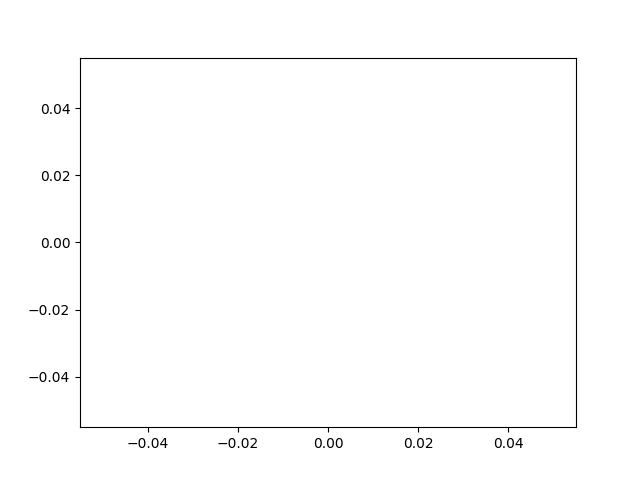

In [12]:
fig2, ax2 = plt.subplots() #Creating figure and axis where the animation will take place
xdata, ydata = [], [] #Empty list of x and y data
ln, = ax2.plot([], [], 'r') #To return the plot object

def init2():
    ax2.set_xlim(-1.2, 1.2) #Setting of x and y limits
    ax2.set_ylim(-1.2, 1.2)
    return ln, 

In [13]:
def ps(n):
    x, y = [], []
    for i in range(n+1):
        x.append(np.cos(2*np.pi*i/n))
        y.append(np.sin(2*np.pi*i/n))
    return x, y

### What does ps do ?
ps generates the list of vertex points of a n sided polygon

In [14]:
def update2(frame):
    global noofside
    k = 300/(noofside-3) #Determine no of frames per transition
    m = frame//k #To determine the transition number
    if frame <= 300:
        x1, y1 = ps((int(frame/k) + 3))
        x2, y2 = ps((int(frame/k) + 4))
    else :
        x1, y1 = ps(noofside - int((frame-300)/k))
        x2, y2 = ps(noofside - int((frame-300)/k) - 1)
    xdata, ydata = morph2(x1, y1, x2, y2, frame) #Updating frames to animate
    ln.set_data(xdata, ydata) #Set plot data so that plotting is done
    return ln,   

### What does update2 do ?
update2 generates the sequence of animation shapes to be followed. For example, for no of sides = 8, it dictates the sequence 3 to 8 and then 8 to 3 based on the input parameter frame. As the number of frames increase, the length of the video increases. As evident, the transition time from n gon to n+1 gon depends on the number of frames being used.

In [15]:
def morph2(x1, y1, x2, y2, frame):
    global noofside
    k = 300/(noofside-3) #Determine no of frames per transition
    m = frame//k #Determine transition in progress
    alpha = (frame - m*k)/k #Determine morphing factor alpha
    if alpha == 0:
        return x1, y1
    elif alpha == 1:
        return x2, y2
    else :
        xm = []
        ym = []
        if frame <= 300 :
            for i in range(0, len(x1)):
                xm.append((1-alpha)*x1[i]+ alpha*x2[i])
                xm.append((1-alpha)*x1[i]+ alpha*x2[i+1])
                ym.append((1-alpha)*y1[i]+ alpha*y2[i])
                ym.append((1-alpha)*y1[i]+ alpha*y2[i+1])
        else :
            for i in range(0, len(x2)):
                xm.append((1-alpha)*x1[i]+ alpha*x2[i])
                xm.append((1-alpha)*x1[i+1]+ alpha*x2[i])
                ym.append((1-alpha)*y1[i]+ alpha*y2[i])
                ym.append((1-alpha)*y1[i+1]+ alpha*y2[i])
        return xm, ym

### What does morph2 do ?
morph2 is a function that returns a linear combination of two adjacent points. For example, let us label the vertices of triangle as (a,b,c) and square as (1,2,3,4). Morph returns a list containing some linear combination of (a,1), (a,2), (b,2), (b,3), (c,3), (c,4), (a,4), (a,1). Since alpha transitions from 0 to 1, initially we need the shape to be x1. This constraint is satisfied by the function. 

Also, as described earlier, alpha has been obtained following "How to get $\alpha$"

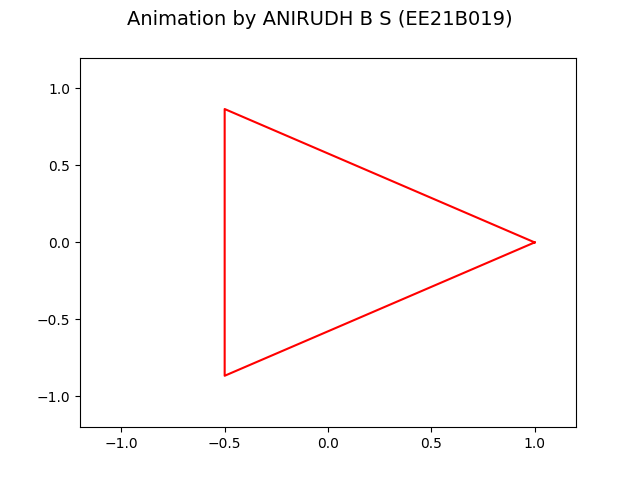

In [16]:
ani = FuncAnimation(fig2, update2, frames = np.linspace(0,600,600), init_func = init2, blit = True, interval = 10, repeat = False)
fig2.suptitle('Animation by ANIRUDH B S (EE21B019)', fontsize=14) #Set title of plot
writervideo = animation.FFMpegWriter(fps=60) #To save the video 
ani.save('Version2.mp4', writer=writervideo) #Version 2
plt.show()

The above cell merely generates the animation and saves it to a mp4 video file named "Version2.mp4" 

### Note :
Version 2 is an exact replica of the video posted on Moodle. 
Additionally, the time taken by the animation on jupyter is not the same as in the video this is because jupyter takes extra time to handle javascript background code and extract frames.